<a href="https://colab.research.google.com/github/PatrickNAquino/Netflix_Movies_and_TV_Shows/blob/main/Netflix_Movies_and_TV_Shows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Netflix Movies and TV Shows
Exploring Netflix Movies and TV Shows kaggle dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
#read the csv file
df = pd.read_csv('netflix_titles.csv', encoding='latin1')

# Understanding the data

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(8809, 26)

In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8809 non-null   object 
 1   type          8809 non-null   object 
 2   title         8809 non-null   object 
 3   director      6175 non-null   object 
 4   cast          7984 non-null   object 
 5   country       7978 non-null   object 
 6   date_added    8799 non-null   object 
 7   release_year  8809 non-null   int64  
 8   rating        8805 non-null   object 
 9   duration      8806 non-null   object 
 10  listed_in     8809 non-null   object 
 11  description   8809 non-null   object 
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
 14  Unnamed: 14   0 non-null      float64
 15  Unnamed: 15   0 non-null      float64
 16  Unnamed: 16   0 non-null      float64
 17  Unnamed: 17   0 non-null      float64
 18  Unnamed: 18   0 non-null    

In [7]:
df.describe()

,release_year,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
count,8809.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2014.181292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,8.818932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1925.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2024.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning & Preparation

In [8]:
#remove empty columns
df = df[['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description']]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      6175 non-null   object
 4   cast          7984 non-null   object
 5   country       7978 non-null   object
 6   date_added    8799 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8805 non-null   object
 9   duration      8806 non-null   object
 10  listed_in     8809 non-null   object
 11  description   8809 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.0+ KB


In [10]:
#checking for null values
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [11]:
# Replacments
df['country'].replace(np.nan, 'No Data',inplace  = True)
df['cast'].replace(np.nan, 'No Data',inplace  = True)
df['director'].replace(np.nan, 'No Data',inplace  = True)

# Dropna
df.dropna(inplace=True)

# Drop Duplicates
df.drop_duplicates(inplace= True)

<ipython-input-11-580118496d39>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country'].replace(np.nan, 'No Data',inplace  = True)


In [12]:
# Transform date into date_time
# We need to use the strip module first because some values in this dataset still contain spaces at the beginning or end of string.
df['date_added'] = df['date_added'].str.strip()

# convert dtype to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

# extract month and year
df['month_added']=df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

In [13]:
# checking the cleaned data
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
month_added     0
year_added      0
dtype: int64

In [14]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Data,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,2021
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,No Data,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,2021
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,2021


# Data Analysis

In [15]:
# How many Movies and TV shows ?
type_count = df['type'].value_counts()
type_count

type
Movie      6127
TV Show    2665
Name: count, dtype: int64

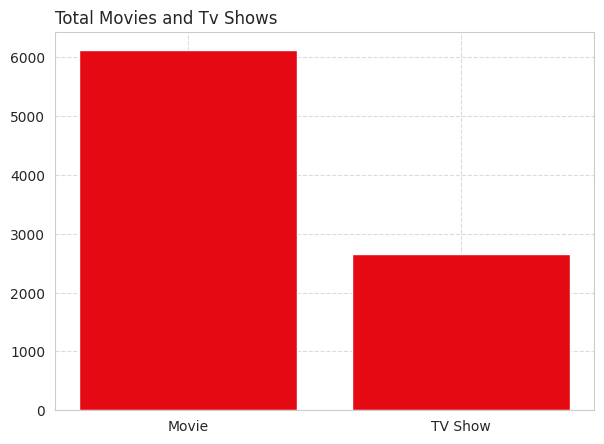

In [16]:
# Plotting
# Plot stacked bars for Movie and TV Show counts
plt.bar(type_count.index, type_count.values, color='#E50914')

plt.grid(linestyle='--', alpha=0.7)
plt.title('Total Movies and Tv Shows', loc='left', fontsize=12)
plt.tight_layout(pad=2)
plt.show()

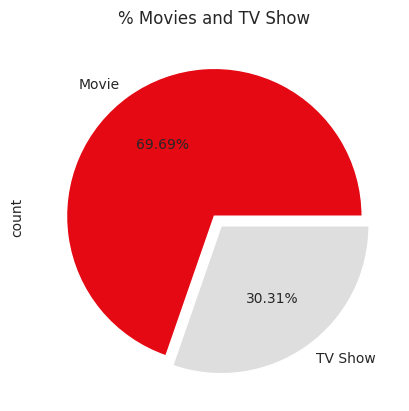

In [17]:
# Ploting to see percentage
df["type"].value_counts().plot.pie(autopct='%1.2f%%',explode=[0,0.08], colors=['#E50914', '#DEDEDE'], title='% Movies and TV Show');

In [18]:
# How many Movies and TV shows added each year?
type_by_year = df.groupby('year_added')['type'].value_counts()

# Pivot the DataFrame to have separate columns for each type
type_by_year = type_by_year.unstack()

type_by_year

type,Movie,TV Show
year_added,,
2008,1.0,1.0
2009,2.0,NaN
2010,1.0,NaN
2011,13.0,NaN
2012,3.0,NaN
2013,6.0,5.0
2014,19.0,5.0
2015,56.0,26.0
2016,251.0,175.0


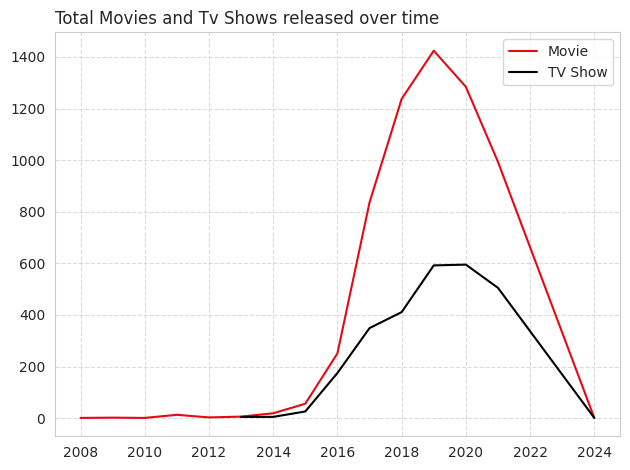

In [19]:
# Plotting
plt.plot(type_by_year['Movie'], label='Movie', color='#E50914')
plt.plot(type_by_year['TV Show'], label='TV Show', color='#000000')
plt.grid(linestyle='--', alpha=0.7)
plt.title('Total Movies and Tv Shows released over time', loc='left', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

In [20]:
# Find the index of the first title added
first_title_index = df['date_added'].idxmin()

# Get the first title added
first_title_added = df.loc[first_title_index, 'title']
first_title_added_type = df.loc[first_title_index, 'type']
first_title_date_added = df.loc[first_title_index, 'date_added']

print("First title added: {} ({}) in {}".format(first_title_added, first_title_added_type ,first_title_date_added))

First title added: To and From New York (Movie) in 2008-01-01 00:00:00


In [21]:
# Find the index of the Last title added
last_title_index = df['date_added'].idxmax()

# Get the Last title added
last_title_added = df.loc[last_title_index, 'title']
last_title_added_type = df.loc[last_title_index, 'type']
last_title_date_added = df.loc[last_title_index, 'date_added']

print("Last title added: {} ({}) in {}".format(last_title_added, last_title_added_type ,last_title_date_added))

Last title added: Parasyte: The Grey (TV Show) in 2024-04-05 00:00:00


<ipython-input-41-b1528b443cdc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['duration_minutes'] = movies_df['duration'].str.extract(r'(\d+)').astype(int)


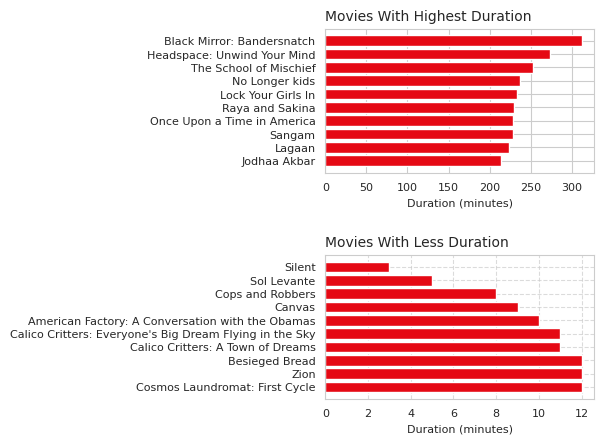

In [41]:
# Analysing Movies duration
movies_df = df.query("type == 'Movie'")

# Extract the duration in minutes for movies
movies_df['duration_minutes'] = movies_df['duration'].str.extract(r'(\d+)').astype(int)

movies_df = movies_df[['title', 'duration_minutes']].sort_values(by='duration_minutes', ascending=False)

# Top 10 Movies with most duration
most_duration_movies = movies_df.head(10).sort_values(by='duration_minutes', ascending=True)

# Top 10 Movies with less duration
less_duration_movies = movies_df.tail(10).sort_values(by='duration_minutes', ascending=False)

# Plotting
fig, (ax1, ax2) = plt.subplots(2)

ax1.barh(most_duration_movies['title'], most_duration_movies['duration_minutes'], color='#E50914')
ax1.set_xlabel('Duration (minutes)', fontsize=8)
ax1.set_title('Movies With Highest Duration', fontsize=10, loc='left')
ax1.tick_params(axis='both', which='major', labelsize=8)  # Adjust fontsize for both major ticks

ax2.barh(less_duration_movies['title'], less_duration_movies['duration_minutes'], color='#E50914')
ax2.set_xlabel('Duration (minutes)', fontsize=8)
ax2.set_title('Movies With Less Duration', fontsize=10, loc='left')
ax2.tick_params(axis='both', which='major', labelsize=8)  # Adjust fontsize for both major ticks

plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout(pad=2)
plt.show()

<ipython-input-43-106ee514767e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows_df['duration_seasons'] = tv_shows_df['duration'].str.extract(r'(\d+)').astype(int)


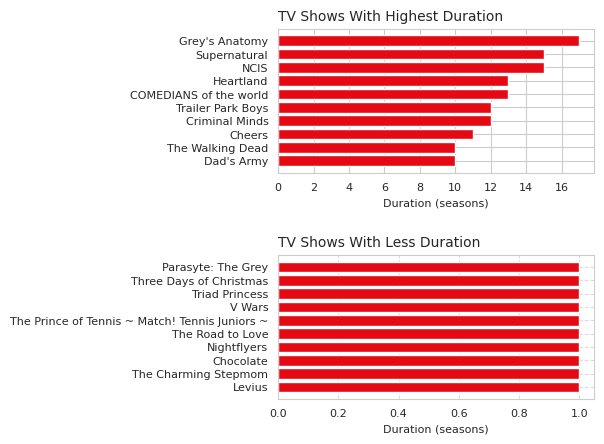

In [43]:
# Analysing TV Show duration
tv_shows_df = df.query("type == 'TV Show'")

# Extract the number of seasons for TV Shows
tv_shows_df['duration_seasons'] = tv_shows_df['duration'].str.extract(r'(\d+)').astype(int)

# Add new columns to the original DataFrame
df['duration_seasons'] = df.apply(lambda row: int(row['duration'].split()[0]) if row['type'] == 'TV Show' else None, axis=1)

tv_shows_df = tv_shows_df[['title', 'duration_seasons']].sort_values(by='duration_seasons', ascending=False)

# Top 10 TV Show with most duration
most_duration_tvshow = tv_shows_df.head(10).sort_values(by='duration_seasons', ascending=True)

# Top 10 TV Show with less duration
less_duration_tvshow = tv_shows_df.tail(10).sort_values(by='duration_seasons', ascending=False)

# Plotting
fig, (ax1, ax2) = plt.subplots(2)

ax1.barh(most_duration_tvshow['title'], most_duration_tvshow['duration_seasons'], color='#E50914')
ax1.set_xlabel('Duration (seasons)', fontsize=8)
ax1.set_title('TV Shows With Highest Duration', fontsize=10, loc='left')
ax1.tick_params(axis='both', which='major', labelsize=8)  # Adjust fontsize for both major ticks

ax2.barh(less_duration_tvshow['title'], less_duration_tvshow['duration_seasons'], color='#E50914')
ax2.set_xlabel('Duration (seasons)', fontsize=8)
ax2.set_title('TV Shows With Less Duration', fontsize=10, loc='left')
ax2.tick_params(axis='both', which='major', labelsize=8)  # Adjust fontsize for both major ticks

plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout(pad=2)
plt.show()

In [24]:
# How many Movies and TV shows released by country?
type_by_country = df.groupby('country')['type'].value_counts()

# Pivot the DataFrame to have separate columns for each type
type_by_country = type_by_country.unstack()

# Creating a total column
type_by_country['Total'] = type_by_country['Movie'] + type_by_country['TV Show']

# Sort the data descending
type_by_country = type_by_country.sort_values(by=['Total'], ascending=False)

# Display the new data
top_10_countries = type_by_country.head(10)

# Set 'country' column as index
#top_10_countries.set_index('country', inplace=True)

top_10_countries

type,Movie,TV Show,Total
country,,,
United States,2056.0,754.0,2810.0
India,893.0,79.0,972.0
No Data,439.0,390.0,829.0
United Kingdom,206.0,212.0,418.0
Japan,76.0,167.0,243.0
South Korea,41.0,159.0,200.0
Canada,122.0,59.0,181.0
Spain,97.0,48.0,145.0
France,75.0,49.0,124.0


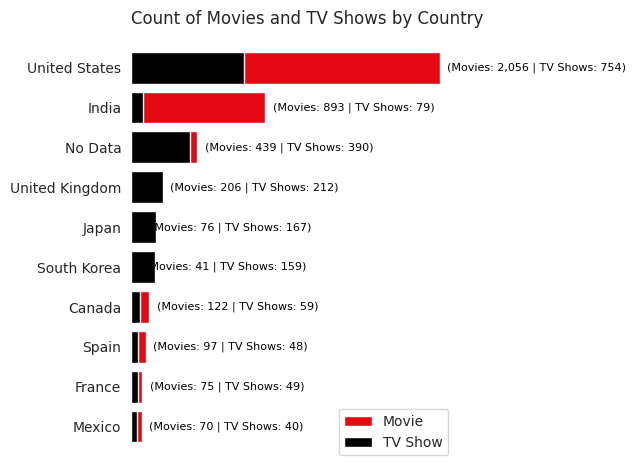

In [25]:
# Plotting
# Plot stacked bars for Movie and TV Show counts
bar1 = plt.barh(top_10_countries.index, top_10_countries['Movie'], label='Movie', color='#E50914')
bar2 = plt.barh(top_10_countries.index, top_10_countries['TV Show'], label='TV Show', color='#000000')

# Add data labels for each bar
for bar, movie_count, tv_show_count in zip(top_10_countries.index, top_10_countries['Movie'], top_10_countries['TV Show']):
    plt.text(movie_count + 50, bar, f'(Movies: {int(movie_count):,} | TV Shows: {int(tv_show_count):,})', ha='left', va='center', color='black', fontsize=8)

plt.title('Count of Movies and TV Shows by Country', loc='left', fontsize=12)
plt.xticks(ha='right')
plt.legend(fontsize=10)
plt.grid(False)
plt.gca().invert_yaxis()  # Invert y-axis to display the longest title on top
# Iterating over all the axes in the figure
# and make the Spines Visibility as False
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
# Selecting the axis-X making the bottom and top axes False.
plt.tick_params(axis='x', which='both', bottom=False,
                top=False, labelbottom=False)
plt.tight_layout(pad=1)
plt.show()

In [26]:
# Titles with no countries associated
no_country_titles = df.query("country == 'No Data'")
no_country_titles.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added,duration_seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No Data,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,2021,1.0
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,No Data,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,2021,1.0
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",No Data,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,September,2021,1.0
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, JosÃ© Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",No Data,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,September,2021,NaN
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",No Data,No Data,No Data,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...","Sicily boasts a bold ""Anti-Mafia"" coalition. B...",September,2021,1.0


In [27]:
# Checking maturity rates
df['rating'].value_counts()

rating
TV-MA       3206
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
A              1
Name: count, dtype: int64

In [28]:
# mapping data rating to rating ages based on the netflix info: https://help.netflix.com/pt/node/2064/us
ratings_ages = {
    'TV-PG': 'Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Kids',
    'TV-Y7': 'Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults',
    'A': 'Adults'
}

df['rating'] = df['rating'].replace(ratings_ages)
df['rating'].unique()
print(df['rating'].unique())


['Teens' 'Adults' 'Kids']


In [29]:
# Analysing Ratings
# How many Movies and TV shows released by rating?
type_by_rating = df.groupby('rating')['type'].value_counts()

# Pivot the DataFrame to have separate columns for each type
type_by_rating = type_by_rating.unstack()

# Creating a total column
type_by_rating['Total'] = type_by_rating.sum(axis=1)

# Replacements
type_by_rating['Movie'].replace(np.nan, 0, inplace  = True)
type_by_rating['TV Show'].replace(np.nan, 0, inplace  = True)

# Sort the data descending
type_by_rating = type_by_rating.sort_values(by=['Total'], ascending=False)

type_by_rating

type,Movie,TV Show,Total
rating,,,
Adults,2941,1150,4091
Teens,1917,730,2647
Kids,1269,785,2054


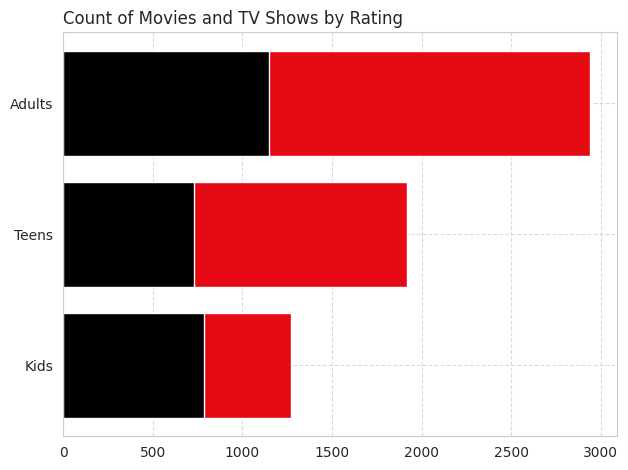

In [30]:
# Plotting
# Plot stacked bars for Movie and TV Show counts
plt.barh(type_by_rating.index, type_by_rating['Movie'], color='#E50914')
plt.barh(type_by_rating.index, type_by_rating['TV Show'], color='#000000')

plt.title('Count of Movies and TV Shows by Rating', loc='left', fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()  # Invert y-axis to display the longest title on top
plt.tight_layout()
plt.show()

In [31]:
# Analysing Ratings productions by country
# How many Movies and TV shows released by rating?
rating_by_country = df.groupby('country')['rating'].value_counts()

# Pivot the DataFrame to have separate columns for each type
rating_by_country = rating_by_country.unstack()

# Creating a total column
rating_by_country['Total'] = rating_by_country.sum(axis=1)

# Sort the data descending
rating_by_country = rating_by_country.sort_values(by=['Total'], ascending=False)

# Replacements
rating_by_country['Adults'].replace(np.nan, 0, inplace  = True)
rating_by_country['Teens'].replace(np.nan, 0, inplace  = True)
rating_by_country['Kids'].replace(np.nan, 0, inplace  = True)

# Filter top 10 countries and make the proportion
rating_by_country = rating_by_country.head(10)
prop_of_total = rating_by_country.div(rating_by_country['Total'], axis=0) * 100
rating_by_country = prop_of_total.round(2)
rating_by_country


rating,Adults,Kids,Teens,Total
country,,,,
United States,49.96,25.37,24.66,100.0
India,26.03,16.98,57.00,100.0
No Data,34.62,36.67,28.71,100.0
United Kingdom,51.20,29.67,19.14,100.0
Japan,35.80,25.93,38.27,100.0
South Korea,44.50,14.00,41.50,100.0
Canada,44.20,39.78,16.02,100.0
Spain,84.14,6.21,9.66,100.0
France,66.94,15.32,17.74,100.0


In [32]:
#dropping the total column
rating_by_country = rating_by_country.drop('Total', axis=1)
rating_by_country

rating,Adults,Kids,Teens
country,,,
United States,49.96,25.37,24.66
India,26.03,16.98,57.00
No Data,34.62,36.67,28.71
United Kingdom,51.20,29.67,19.14
Japan,35.80,25.93,38.27
South Korea,44.50,14.00,41.50
Canada,44.20,39.78,16.02
Spain,84.14,6.21,9.66
France,66.94,15.32,17.74


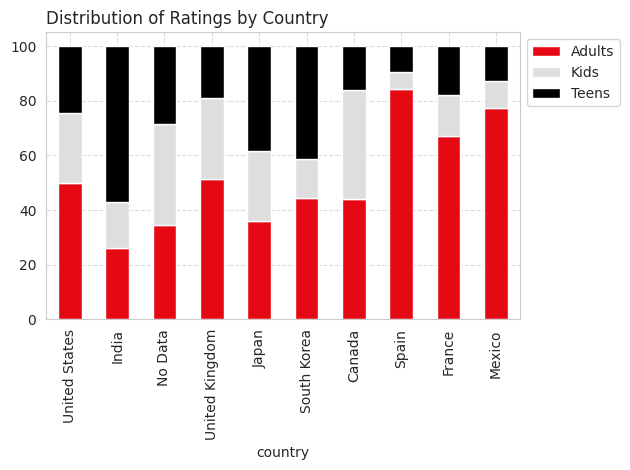

In [39]:
# Plotting
rating_by_country.plot(kind='bar', stacked=True, color=['#E50914', '#DEDEDE', '#000000'])

plt.title('Distribution of Ratings by Country', loc='left', fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# Insights

- The majority of Netflix content are movies, representing almost 70% of the streamming content.
- Since 2016 the number of content added in the catalog started increasing reaching the highest numbers between 2019 and 2020.
- The first title added: To and From New York (Movie) in 2008.
- Last title added: Parasyte: The Grey (TV Show) in 2024.
- Black Mirror: Bandersnatch (312 min) and Silent (3 min) are the movies with highest and less duration respectively.
- Grey's Anatomy (17 seasons) and Parasyte: The Grey (1 season) are the TV Shows with more and less duration.
- USA is the country that release more content in the platform leading both types with 34% of movies and 28% of TV Shows. Their content are most focused in the adult public.
- Spain, France and Mexico have great majority of content focused in the adult public while India, Japan an South Korea focus in the Teens.

